In [33]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [34]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [35]:
y.shape, tx.shape, weight.shape

((10000,), (10000, 2), (10000,))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [36]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    #MSE
    error = y - np.dot(tx, w)
    size = y.shape[0]
    return np.dot(error.T, error)/(2*size)

In [37]:
np.dot(np.array([[1, 2], [3, 4]]), np.array([4, 4]).T)

array([12, 28])

# 2 Grid Search

Fill in the function `grid_search()` below:

In [38]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i, weight_1 in enumerate(w0):
        for j, weight_2 in enumerate(w1):
            losses[i, j] = compute_loss(y, tx, np.array([weight_1, weight_2]).T)
            
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.424483146782485, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.024 seconds


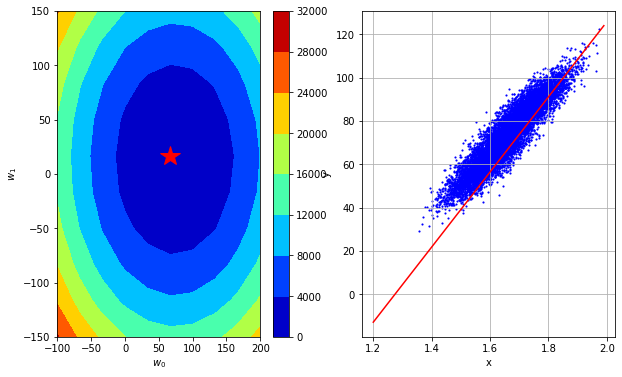

In [39]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [40]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    size = y.shape[0]
    error = y - np.dot(tx, w)
    gradient = (-1/size)*np.dot(tx.T, error)
    return compute_loss(y, tx, w), gradient

In [41]:
print(compute_gradient(y, tx, np.array([100, 20]).T))
print(compute_gradient(y, tx, np.array([50, 10]).T))

(393.250263848868, array([26.706078  ,  6.52028757]))
(292.7434883040181, array([-23.293922  ,  -3.47971243]))


Please fill in the functions `gradient_descent` below:

In [42]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss, gradient = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [43]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759168, w0=51.30574540147361, w1=9.435798704492269
Gradient Descent(1/49): loss=265.3024621089606, w0=66.69746902191571, w1=12.266538315839997
Gradient Descent(2/49): loss=37.87837955044127, w0=71.31498610804834, w1=13.115760199244328
Gradient Descent(3/49): loss=17.410212120174478, w0=72.70024123388814, w1=13.37052676426563
Gradient Descent(4/49): loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=15.386020684743528, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638301, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.3858879656522, w0=73.29379216412119, w1=13.479

In [44]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [45]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
#     size = y.shape[0]
#     n = np.randint(0, size, size=1)
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=10):

            loss, gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)

            w = w - gamma * gradient
            # store w and loss
            ws.append(w)
            losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [46]:
ix = np.random.randint(0, 10, size=5)

np.array(range(10))[ix]

array([1, 8, 2, 4, 3])

In [47]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.8
batch_size = 100

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=15.259910353429962, w0=73.25407966675724, w1=13.269781228508267
Stochastic Gradient Descent(1/49): loss=15.175878409474858, w0=73.21189511406547, w1=13.592359720194448
Stochastic Gradient Descent(2/49): loss=13.273990849369907, w0=72.78320378539468, w1=13.66674855563153
Stochastic Gradient Descent(3/49): loss=17.63426246183344, w0=74.30199607674419, w1=12.91250631039621
Stochastic Gradient Descent(4/49): loss=12.734665000040598, w0=72.87289700448974, w1=13.54457565395762
Stochastic Gradient Descent(5/49): loss=13.671441459030023, w0=73.28741619380934, w1=14.168328906473628
Stochastic Gradient Descent(6/49): loss=10.984876153294898, w0=73.50098511166424, w1=13.413750504465616
Stochastic Gradient Descent(7/49): loss=13.309882317888015, w0=73.11495174681355, w1=13.862368711006276
Stochastic Gradient Descent(8/49): loss=16.790014321114, w0=74.01020710534785, w1=12.42758490491151
Stochastic Gradient Descent(9/49): loss=15.071855909368432, w0=73.770334

In [48]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

MAE : non-smooth function => usr subgradient

### Exercise 5

Load and plot data containing outliers

In [153]:
height, weight, gender = load_data(sub_sample=False, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

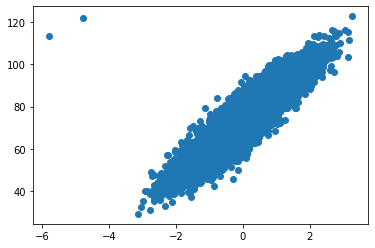

In [154]:
plt.scatter(x, y)

In [155]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent outliers: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2793.0633249190396, w0=51.311949971831666, w1=9.375829281932598
Gradient Descent(1/49): loss=266.5853963287448, w0=66.70553496338118, w1=12.188578066512385
Gradient Descent(2/49): loss=39.20238275561797, w0=71.32361046084603, w1=13.032402701886326
Gradient Descent(3/49): loss=18.737911534036595, w0=72.70903311008549, w1=13.285550092498509
Gradient Descent(4/49): loss=16.896109124094252, w0=73.12465990485732, w1=13.361494309682165
Gradient Descent(5/49): loss=16.73034690719944, w0=73.24934794328888, w1=13.384277574837261
Gradient Descent(6/49): loss=16.71542830767891, w0=73.28675435481834, w1=13.39111255438379
Gradient Descent(7/49): loss=16.714085633722057, w0=73.29797627827718, w1=13.393163048247748
Gradient Descent(8/49): loss=16.713964793065944, w0=73.30134285531483, w1=13.393778196406936
Gradient Descent(9/49): loss=16.71395391740689, w0=73.30235282842612, w1=13.393962740854693
Gradient Descent(10/49): loss=16.71395293859758, w0=73.30265582035952, w1=13

In [156]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.8
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD outliers: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=124.16238640593511, w0=88.9907461712394, w1=-16.258064314350342
Stochastic Gradient Descent(1/49): loss=25.316806620056777, w0=74.185883707902, w1=9.598775623158106
Stochastic Gradient Descent(2/49): loss=14.762664677213982, w0=66.18025508224981, w1=6.942061926950331
Stochastic Gradient Descent(3/49): loss=28.833713425976587, w0=74.57146950937623, w1=27.02397662978203
Stochastic Gradient Descent(4/49): loss=222.17411053670554, w0=87.41389064754489, w1=25.205688224888743
Stochastic Gradient Descent(5/49): loss=1930.142321990805, w0=42.58687513800414, w1=101.6694431223755
Stochastic Gradient Descent(6/49): loss=2.414488020920537, w0=82.12751119777424, w1=2.749921175294136
Stochastic Gradient Descent(7/49): loss=1290.815387504167, w0=-20.365973905119922, w1=-42.98968323582251
Stochastic Gradient Descent(8/49): loss=298.1140602066823, w0=84.0907589044074, w1=17.44616671022265
Stochastic Gradient Descent(9/49): loss=180.04600984264238, w0=72.903966596

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [157]:
def mae_loss(y, tx, w):
    return np.abs(y - np.dot(tx, w)).reshape(-1, 1).mean()

In [158]:
def compute_gradient_mae(y, tx, w):
    size = y.shape[0]
    dimensions = len(w)
    y, w = y.reshape(-1, 1), w.reshape(-1, 1)
    Y = np.dot(y, np.ones((1, dimensions)))
    W = np.dot(np.ones((size, 1)), w.T)
    gradient = np.transpose(np.sum(tx*np.abs(Y - tx*W), axis=0))/(-size)
    return mae_loss(y, tx, w), gradient

In [159]:
def mae_gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):

        loss, gradient = compute_gradient_mae(y, tx, w)
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent MAE({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [160]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

start_time = datetime.datetime.now()
gradient_losses, gradient_ws = mae_gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent outliers MAE: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent MAE(0/49): loss=73.30278567404525, w0=7.330278567404484, w1=1.3394041831332346
Gradient Descent MAE(1/49): loss=65.97250710664078, w0=13.927529278068569, w1=2.544867947953132
Gradient Descent MAE(2/49): loss=59.375256395976685, w0=19.865054917666235, w1=3.6297853362910732
Gradient Descent MAE(3/49): loss=53.43773075637902, w0=25.20882799330415, w1=4.606210985795206
Gradient Descent MAE(4/49): loss=48.093957680741106, w0=30.018223761378255, w1=5.484994070348923
Gradient Descent MAE(5/49): loss=43.284561912667, w0=34.3466928373927, w1=6.275898846447264
Gradient Descent MAE(6/49): loss=38.95609283665256, w0=38.24252714640376, w1=6.9877131449357766
Gradient Descent MAE(7/49): loss=35.0602585276415, w0=41.74937094435269, w1=7.628346013575424
Gradient Descent MAE(8/49): loss=31.55341472969257, w0=44.907375673533, w1=8.204915595351117
Gradient Descent MAE(9/49): loss=28.39541000051226, w0=47.75482243193231, w1=8.723828218949237
Gradient Descent MAE(10/49): loss=25.54796324211

In [161]:
print(np.sum(tx > 0), tx.shape)


14956 (10002, 2)
